<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_07_4_stable_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks

**Module 7: Image Generative Models**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 7 Material

- Part 7.1 Introduction to Generative AI [[Video]](https://www.youtube.com/watch?v=2FbkbSnS8sg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_1_img_generative.ipynb)
- Part 7.2 Generating Faces with StyleGAN3 [[Video]](https://www.youtube.com/watch?v=VcI2o1yEQa0&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_2_gan_intro.ipynb)
- Part 7.3 GANS to Enhance Old Photographs Deoldify [[Video]](https://www.youtube.com/watch?v=y7HvjfKsZ50&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_3_deoldify.ipynb)
- **Part 7.4 Text to Images with StableDiffusion** [[Video]](https://www.youtube.com/watch?v=gLj6-gJ-lR4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_4_stable_diff.ipynb)
- Part 7.5 Finetuning with Dreambooth [[Video]](https://www.youtube.com/watch?v=G_FYFSzkB5Y&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_5_dream_booth.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.


In [1]:
try:
    import google.colab
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 7.4 Text to Images with StableDiffusion

We will now see how to use Stable Diffusion to create various images from textual prompts. There will be four settings that we will deal with as we generate these images.

* **model**: We will use the trained/finetuned model. Different models are optimized for different types of images.
* **prompt**: Text that you provide to describe what sort of image you would like created.
* **negative prompt**: Text that you describe elements that should not be present in your image.
* **seed**: The same image for the prompt/negative prompt will always be produced for the same seed. To get a different image for the same prompts, change the seed.

We will begin by installing Stable Diffusion into Google CoLab.

In [2]:
!pip install --upgrade diffusers[torch]
!pip install k_diffusion
!pip install transformers scipy ftfy accelerate

  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl

## Basic Models

To make use of Stable Diffusion we will use the HuggingFace DiffusionPipeline. When setting up the pipeline we specify to use the "CompVis/stable-diffusion-v1-4" model, which is a basic model created to be used with StableDiffusion. The following code sets up this model and downloads it from HuggingFace.

In [3]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    custom_pipeline="lpw_stable_diffusion",
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

We will begin by creating a simple picture of an astronaut playing golf on the moon! We first use the seed of 100, you could also use -1 to request a random seed. We specify both the prompt and negative prompt.

This pipeline does contain code to ensure that no images generated are "not safe for work" (NSFW). This setting tries to protect you from unsafe images. If such an image is generated, you will see the following message.

```
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
```

You may wish to disable this feature. To do this, uncomment the pipe.safety_checker line. Be cafeful, if you do disable this, as unsafe images may be generated containing NSFW themes, which might contain violence, nudity, or sexual themes.

The following code generates the astronaut image.

  0%|          | 0/50 [00:00<?, ?it/s]

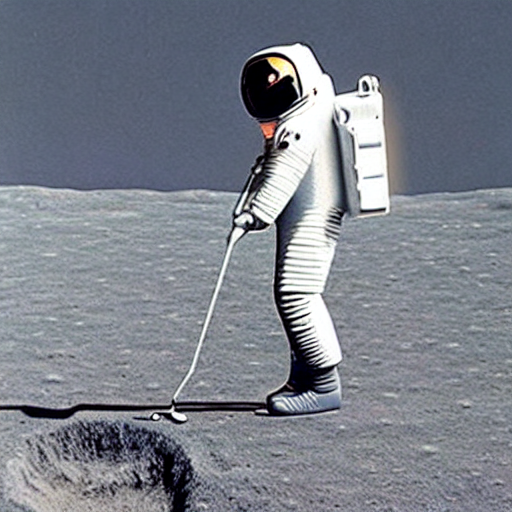

In [4]:
# Random number seed, -1 for random seed
seed = 100 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
astronaut playing golf on the moon"""

neg_prompt = """
signature, watermark
"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

## Realistic Models

You might like to try adjusting the code in the previous section to create other images. If you are trying to create images of people, you will be better served with a model like Realistic Vision, which will be demonstrated in this section. The following code loads Realistic Vision.

In [17]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    #'hakurei/waifu-diffusion',
    "SG161222/Realistic_Vision_V2.0",
    custom_pipeline="lpw_stable_diffusion",
    generator=generator,
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

Keyword arguments {'generator': <torch._C.Generator object at 0x7e02eca25df0>} are not expected by StableDiffusionLongPromptWeightingPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


We now generate an image with a much more complex prompt. The positive and negative prompts describe how to generate an image of a young woman. Stable diffusion prompts are usually comma separated lists of attributes to draw. You will notice that some are enclosed in paranthesis; which designates that this attribute is more important. A number, near the end, separated by a colon specifies how important.

  0%|          | 0/50 [00:00<?, ?it/s]

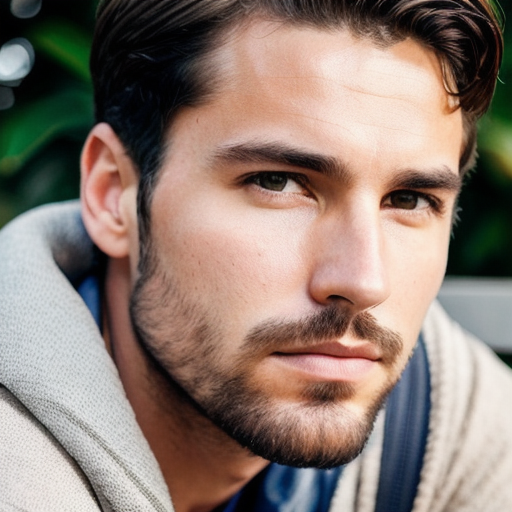

In [15]:
# Random number seed, -1 for random seed
seed = 103 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(man age 30 sitting on a bench), (short brown hair:1.2), ray traced shadows,
RAW, 8k, (mild stubble:1.1), (sub-surface scattering:1.55), (natural sweat:1.15), (light freckles:0.45),
highly detailed skin, (pores:0.8), (FACE1:0.65), (FACE2:1.1), (FACE3:0.9),
sharp jawline, perfect symmetrical eyes, no visible scars or makeup,
(skin pores:1.05), ultra detailed face, ultra detailed skin,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

In [18]:
import os

# Ensure the results directory exists
os.makedirs("./results", exist_ok=True)

# Initial seed value
seed = 101  # Starting seed

# Number of images to generate
num_images = 1000

# Prompts
prompt = """
(man age 30 sitting on a bench), (short brown hair:1.2), ray traced shadows,
RAW, 8k, (mild stubble:1.1), (sub-surface scattering:1.55), (natural sweat:1.15), (light freckles:0.45),
highly detailed skin, (pores:0.8), (FACE1:0.65), (FACE2:1.1), (FACE3:0.9),
sharp jawline, perfect symmetrical eyes, no visible scars or makeup,
(skin pores:1.05), ultra detailed face, ultra detailed skin,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""


# Generate and save images
for i in range(num_images):
    # Increment seed for each image
    current_seed = seed + i
    generator = torch.Generator(device="cuda").manual_seed(current_seed)

    # Generate image
    image = pipe.text2img(
        prompt=prompt,
        negative_prompt=neg_prompt,
        width=512,
        height=512,
        max_embeddings_multiples=3,
        generator=generator
    ).images[0]

    # Save image as .png
    image.save(f"./results/image_{i + 1:01d}.png")

    print(f"Generated and saved image {i + 1} with seed {current_seed}")

print("Image generation complete. Check the ./results folder for output.")


Token indices sequence length is longer than the specified maximum sequence length for this model (117 > 77). Running this sequence through the model will result in indexing errors


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 1 with seed 101


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 2 with seed 102


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 3 with seed 103


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 4 with seed 104


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 5 with seed 105


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 6 with seed 106


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 7 with seed 107


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 8 with seed 108


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 9 with seed 109


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 10 with seed 110


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 11 with seed 111


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 12 with seed 112


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 13 with seed 113


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 14 with seed 114


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 15 with seed 115


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 16 with seed 116


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 17 with seed 117


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 18 with seed 118


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 19 with seed 119


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 20 with seed 120


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 21 with seed 121


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 22 with seed 122


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 23 with seed 123


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 24 with seed 124


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 25 with seed 125


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 26 with seed 126


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 27 with seed 127


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 28 with seed 128


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 29 with seed 129


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 30 with seed 130


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 31 with seed 131


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 32 with seed 132


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 33 with seed 133


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 34 with seed 134


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 35 with seed 135


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 36 with seed 136


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 37 with seed 137


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 38 with seed 138


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 39 with seed 139


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 40 with seed 140


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 41 with seed 141


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 42 with seed 142


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 43 with seed 143


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 44 with seed 144


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 45 with seed 145


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 46 with seed 146


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 47 with seed 147


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 48 with seed 148


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 49 with seed 149


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 50 with seed 150


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 51 with seed 151


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 52 with seed 152


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 53 with seed 153


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 54 with seed 154


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 55 with seed 155


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 56 with seed 156


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 57 with seed 157


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 58 with seed 158


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 59 with seed 159


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 60 with seed 160


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 61 with seed 161


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 62 with seed 162


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 63 with seed 163


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 64 with seed 164


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 65 with seed 165


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 66 with seed 166


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 67 with seed 167


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 68 with seed 168


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 69 with seed 169


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 70 with seed 170


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 71 with seed 171


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 72 with seed 172


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 73 with seed 173


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 74 with seed 174


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 75 with seed 175


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 76 with seed 176


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 77 with seed 177


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 78 with seed 178


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 79 with seed 179


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 80 with seed 180


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 81 with seed 181


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 82 with seed 182


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 83 with seed 183


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 84 with seed 184


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 85 with seed 185


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 86 with seed 186


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 87 with seed 187


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 88 with seed 188


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 89 with seed 189


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 90 with seed 190


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 91 with seed 191


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 92 with seed 192


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 93 with seed 193


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 94 with seed 194


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 95 with seed 195


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 96 with seed 196


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 97 with seed 197


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 98 with seed 198


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 99 with seed 199


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image 100 with seed 200
Image generation complete. Check the ./results folder for output.


  0%|          | 0/50 [00:00<?, ?it/s]

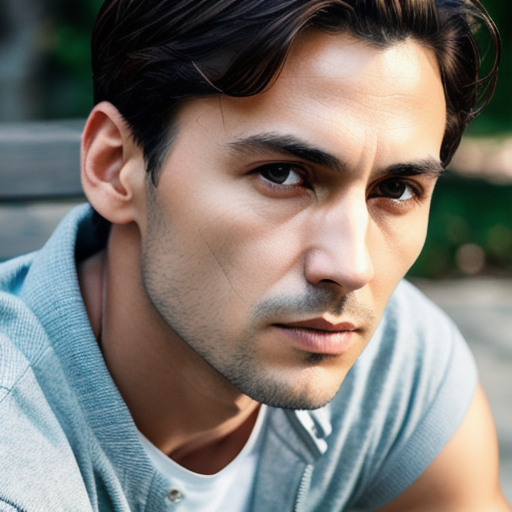

In [27]:
# Random number seed, -1 for random seed
seed = 103 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))


# Prompts
prompt = """
(man age 30 sitting on a bench), (short brown hair:1.2), ray traced shadows,
RAW, 8k, (smooth skin:1.5), (natural complexion:1.2), (minimal facial details:1.3),
(skin without visible pores:1.3), soft lighting, gentle facial texture,
(subtle facial asymmetry:1.4), (slightly mismatched eyes:1.2),
(uneven jawline:1.4), (mildly distorted cheekbones:1.3),
perfect symmetrical eyes, no visible scars or makeup, low-texture detail,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(detailed skin, skin pores, freckles:1.5), ultra-detailed features,
(perfect facial symmetry:1.5), overly smooth or flawless face,
(high-resolution features:1.3), (natural proportions:1.4),
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (117 > 77). Running this sequence through the model will result in indexing errors


  0%|          | 0/50 [00:00<?, ?it/s]

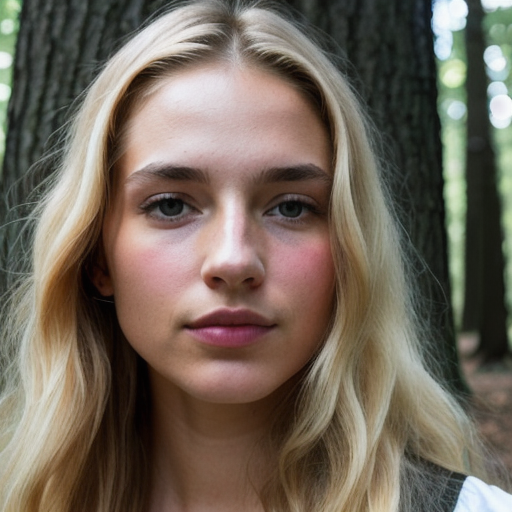

In [6]:
# Random number seed, -1 for random seed
seed = 102 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(woman age 26 standing by tree), (long blonde hair:1.2), ray traced shadows,
RAW, 8k, (eczema:0.7), (sub-surface scattering:1.55), (sweat:1.22), (freckles:0.55),
highly detailed skin, (Acne:0.7), (FACE1:0.5), (FACE2:1.2), (FACE3:0.85),
perfect eyes, no makeup. (skin spores:1.05), (skin spores:1.05),
ultra detailed face, ultra detailed skin, film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

  0%|          | 0/50 [00:00<?, ?it/s]

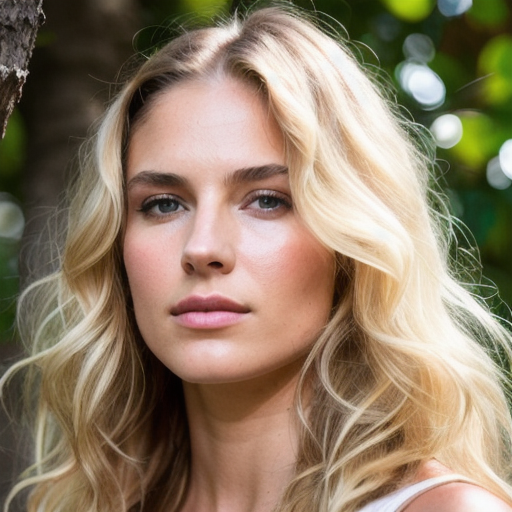

In [14]:
# Random number seed, -1 for random seed
seed = 103 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(woman age 30 standing by a tree), (long blonde hair:1.2), ray traced shadows,
RAW, 8k, (light eczema:0.7), (sub-surface scattering:1.55), (natural sweat:1.22), (light freckles:0.55),
highly detailed skin, (mild acne:0.7), (FACE1:0.5), (FACE2:1.2), (FACE3:0.85),
perfect eyes, no makeup, (skin pores:1.05), ultra detailed face, ultra detailed skin,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

In [19]:
import shutil

# 생성된 결과 폴더를 zip 파일로 압축
shutil.make_archive("results", "zip", "./results")

# 압축 파일 다운로드
from google.colab import files
files.download("results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Anime Models

If you would like to generate cartoon or Anime style images, the waifu-diffusion model will work nicely. The code below loads this model and generates an Anime character.

In [7]:
# from diffusers import DiffusionPipeline
# import torch

# pipe = DiffusionPipeline.from_pretrained(
#     "hakurei/waifu-diffusion",
#     custom_pipeline="lpw_stable_diffusion",
#     generator=generator,
#     torch_dtype=torch.float16
# )
# pipe=pipe.to("cuda")

Keyword arguments {'generator': <torch._C.Generator object at 0x7e02ec9cdd70>} are not expected by StableDiffusionLongPromptWeightingPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (108 > 77). Running this sequence through the model will result in indexing errors


  0%|          | 0/50 [00:00<?, ?it/s]

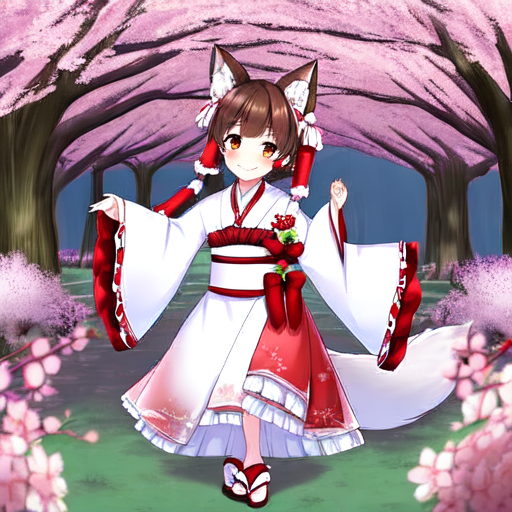

In [8]:
# prompt = """
# best_quality (1girl:1.3) bow bride brown_hair closed_mouth frilled_bow
# frilled_hair_tubes frills (full_body:1.3) fox_ear hair_bow hair_tubes
# happy hood japanese_clothes kimono long_sleeves red_bow smile solo tabi
# uchikake white_kimono wide_sleeves cherry_blossoms"""
# neg_prompt = """
# lowres, bad_anatomy, error_body, error_hair, error_arm, error_hands, bad_hands,
# error_fingers, bad_fingers, missing_fingers, error_legs, bad_legs, multiple_legs,
# missing_legs, error_lighting, error_shadow, error_reflection, text, error,
# extra_digit, fewer_digits, cropped, worst_quality, low_quality, normal_quality,
# jpeg_artifacts, signature, watermark, username, blurry"""

# # Random number seed, -1 for random seed
# seed = 105 #-1
# seed = random.randint(0, 2**32) if seed == -1 else seed
# generator = torch.Generator(device='cuda').manual_seed(int(seed))

# # Generate the image
# pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
#               max_embeddings_multiples=3,generator=generator).images[0]